Web Attack Detuction Using Machine Learning

Business Constrain:

1.  Web attack can be a serious threat to a web application they take advantage on the vulnerability of the application gain acceess of the application DB and do serious damage
2.   There are various types of web attacks which attacks the web application and cause serious damage.
3. Existing way to avoid the web attack is to use Intrusion detuction system, which can detuck the mallicious web request and stop them from damaging the web application.
4. But the IDS cannot detuct and restrict the attacks in full scale as they are limited to observe static patterns in the web requests, hence some requests which are mallicious but do not follow the pattern may easily cross the IDS and cause damage to web application

Objective:

To build an Network based Intrusion detuction system which can detuct the malicious traffic flow over the application layer and stop them from entering into the Web application there by protecting the Web application

Performance Metrics:

1) True postive and False positive rate can be the important constrains in handling this issue, traffics which are considered to be false negative and passed can cause damage to the application
2) Precision, Recall, F1 score are the Performance metrices accounted here

Dataset:

The dataset used here is the (CSE-CIC-IDS2018) dataset:https://www.kaggle.com/solarmainframe/ids-intrusion-csv?select=02-14-2018.csv

The data is a set of benign and mallicious network traffic which is collected by building a manual infrastructure of Switches, Servers and PCs and the bening  and mallicious traffic signals are passed and the same has been recorded and converted as data.

Different types of web attacks are passed on each day and logs for the corresponding dates are collected and stored 


In [1]:
from google.colab import drive #connecting to drive to load the dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #loading the obtained DDOS attack datset from Kaggles # each csv hold the diffrent type of DDOS attacks collected on diffrent dates

df1=pd.read_csv('/content/drive/My Drive/02-14-2018.csv')
df2=pd.read_csv('/content/drive/My Drive/02-15-2018.csv')
df3=pd.read_csv('/content/drive/My Drive/02-16-2018.csv')
df4=pd.read_csv('/content/drive/My Drive/02-21-2018.csv')
df5=pd.read_csv('/content/drive/My Drive/02-22-2018.csv')
df6=pd.read_csv('/content/drive/My Drive/02-23-2018.csv')
df7=pd.read_csv('/content/drive/My Drive/03-01-2018.csv')
df8=pd.read_csv('/content/drive/My Drive/03-02-2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1) Reading each files to know the shape and the flavour of DDOS attacks present 
in the Dataset

In [3]:
print('the shape of dataframe1',df1.shape) #reading the file shape for each data frames
print('the shape of dataframe2',df2.shape)
print('the shape of dataframe3',df3.shape)
print('the shape of dataframe4',df4.shape)
print('the shape of dataframe5',df5.shape)
print('the shape of dataframe6',df5.shape)
print('the shape of dataframe7',df7.shape)
print('the shape of dataframe8',df8.shape)


the shape of dataframe1 (1048575, 80)
the shape of dataframe2 (1048575, 80)
the shape of dataframe3 (1048575, 80)
the shape of dataframe4 (1048575, 80)
the shape of dataframe5 (1048575, 80)
the shape of dataframe6 (1048575, 80)
the shape of dataframe7 (331125, 80)
the shape of dataframe8 (1048575, 80)


2) Counting the Unique types of DDOS attacks present in each Dataset

In [4]:
print('The Type and quantity of attach present in df1 \n',df1['Label'].value_counts() )

The Type and quantity of attach present in df1 
 Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64


In [5]:
print('The Type and quantity of attach present in df2 \n ',df2['Label'].value_counts() )

The Type and quantity of attach present in df2 
  Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64


In [6]:
print('The Type and quantity of attach present in df3 \n',df3['Label'].value_counts() )

The Type and quantity of attach present in df3 
 DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1
Name: Label, dtype: int64


In [7]:
df3.drop(df3.loc[df3['Label']=='Label'].index,inplace=True) # the column value = 'Label' does not account to any types of web attack, hence removing this
print('The Type and quantity of attach present in df3 \n',df3['Label'].value_counts() )

The Type and quantity of attach present in df3 
 DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: Label, dtype: int64


In [8]:
print('The Type and quantity of attach present in df4 \n',df4['Label'].value_counts() )

The Type and quantity of attach present in df4 
 DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: Label, dtype: int64


In [9]:
print('The Type and quantity of attach present in df5 \n',df5['Label'].value_counts() )

The Type and quantity of attach present in df5 
 Benign              1048213
Brute Force -Web        249
Brute Force -XSS         79
SQL Injection            34
Name: Label, dtype: int64


In [10]:
print('The Type and quantity of attach present in df6 \n',df6['Label'].value_counts() )

The Type and quantity of attach present in df6 
 Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: Label, dtype: int64


In [11]:
print('The Type and quantity of attach present in df7 \n',df7['Label'].value_counts() )

The Type and quantity of attach present in df7 
 Benign           238037
Infilteration     93063
Label                25
Name: Label, dtype: int64


In [12]:

df7.drop(df7.loc[df7['Label']=='Label'].index,inplace=True) # the column value = 'Label' does not account for any type of DDOS attack, hence removing this

print('The Type and quantity of attach present in df3 \n',df7['Label'].value_counts() )

The Type and quantity of attach present in df3 
 Benign           238037
Infilteration     93063
Name: Label, dtype: int64


In [13]:
print('The Type and quantity of attach present in df8 \n',df8['Label'].value_counts() )

The Type and quantity of attach present in df8 
 Benign    762384
Bot       286191
Name: Label, dtype: int64


3)Since the dataframa very huge to concatinate and load , using stratified sampling to sample data samples from the population on each dates  dataframe.

In [14]:
Strat_df1=df1.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000)) # Applying Stratified Sampling on the datasets
Strat_df2=df2.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
Strat_df3=df3.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
del df1,df2,df3

print('The Stratified Sample of Dataset1 \n ', Strat_df1['Label'].value_counts()) #obtaning equal no of class sample to process EDA 
print('='*100)
print('The Stratified Sample of Dataset2 \n ', Strat_df2['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset3 \n ', Strat_df3['Label'].value_counts())

The Stratified Sample of Dataset1 
  SSH-Bruteforce    10000
Benign            10000
FTP-BruteForce    10000
Name: Label, dtype: int64
The Stratified Sample of Dataset2 
  DoS attacks-GoldenEye    10000
Benign                   10000
DoS attacks-Slowloris    10000
Name: Label, dtype: int64
The Stratified Sample of Dataset3 
  Benign                      10000
DoS attacks-SlowHTTPTest    10000
DoS attacks-Hulk            10000
Name: Label, dtype: int64


In [15]:
import numpy as np #web attcks in these dataframes are less than 10000 hence we are randomly sampling the points here 
N=10000
Strat_df4=df4.head(10000)
Strat_df5=df5.head(10000)
Strat_df6=df6.head(10000)
del df4,df5,df6


print('The Stratified Sample of Dataset4 \n ', Strat_df4['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset4 \n ', Strat_df5['Label'].value_counts())
print('='*100)
print('The Stratified Sample of Dataset4 \n ', Strat_df6['Label'].value_counts())

The Stratified Sample of Dataset4 
  DDOS attack-HOIC        6070
Benign                  2200
DDOS attack-LOIC-UDP    1730
Name: Label, dtype: int64
The Stratified Sample of Dataset4 
  Benign              9638
Brute Force -Web     249
Brute Force -XSS      79
SQL Injection         34
Name: Label, dtype: int64
The Stratified Sample of Dataset4 
  Benign              9434
Brute Force -Web     362
Brute Force -XSS     151
SQL Injection         53
Name: Label, dtype: int64


In [16]:
Strat_df7=df7.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000)) # Applying Stratified Sampling on the datasets
Strat_df8=df8.groupby('Label', group_keys=False).apply(lambda x: x.sample(10000))
del df7,df8

print('The Stratified Sample of Dataset1 \n ', Strat_df7['Label'].value_counts()) #obtaning equal no of class sample to process EDA 
print('='*100)
print('The Stratified Sample of Dataset2 \n ', Strat_df8['Label'].value_counts())
print('='*100)


The Stratified Sample of Dataset1 
  Infilteration    10000
Benign           10000
Name: Label, dtype: int64
The Stratified Sample of Dataset2 
  Bot       10000
Benign    10000
Name: Label, dtype: int64


4) Concatinating all the samples into a single final Dataframe

In [17]:
final_dataset=pd.concat([Strat_df1,Strat_df2]) 
del Strat_df1,Strat_df2
final_dataset=pd.concat([final_dataset,Strat_df3])
del Strat_df3
final_dataset=pd.concat([final_dataset,Strat_df4])
del Strat_df4
final_dataset=pd.concat([final_dataset,Strat_df5])
del Strat_df5
final_dataset=pd.concat([final_dataset,Strat_df6])
del Strat_df6
final_dataset=pd.concat([final_dataset,Strat_df7])
del Strat_df7
final_dataset=pd.concat([final_dataset,Strat_df8])
del Strat_df8

In [18]:
pd.set_option('display.max_rows',None)
final_dataset[final_dataset.isnull().any(axis=1)]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
730005,49508,6,14/02/2018 08:32:03,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,32,-1,0,20,0,0,0,0,0,0,0,0,Benign
844948,50062,6,14/02/2018 09:50:30,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,180,-1,0,20,0,0,0,0,0,0,0,0,Benign
945035,52134,6,14/02/2018 05:09:29,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,180,-1,0,20,0,0,0,0,0,0,0,0,Benign
534423,51744,6,14/02/2018 01:29:10,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,-1,0,20,0,0,0,0,0,0,0,0,Benign
645748,49916,6,14/02/2018 09:29:27,0,3,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,62,-1,0,20,0,0,0,0,0,0,0,0,Benign
753704,49958,6,14/02/2018 09:25:23,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,184,-1,0,20,0,0,0,0,0,0,0,0,Benign
540463,50439,6,14/02/2018 11:57:39,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,4731,-1,0,20,0,0,0,0,0,0,0,0,Benign
571623,51998,6,14/02/2018 01:52:09,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,-1,0,20,0,0,0,0,0,0,0,0,Benign
833464,49813,6,14/02/2018 10:06:02,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,180,-1,0,20,0,0,0,0,0,0,0,0,Benign
385409,50530,6,14/02/2018 11:37:35,0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,180,-1,0,20,0,0,0,0,0,0,0,0,Benign


In [19]:
final_dataset.shape

(160000, 80)

In [20]:
final_dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
724050,3389,6,14/02/2018 09:16:06,2167755,9,8,1138,2754,677,0,126.444,218.25,1173,0,344.25,520.282,1795.41,7.84221,135485,247307,968714,4,2167755,270969,351464,1069743,4,2104663,300666,322954,968714,65119,0,0,0,0,204,172,4.15176,3.69045,0,1173,216.222,385.497,148608,0,0,0,1,0,0,0,0,0,228.941,126.444,344.25,0,0,0,0,0,0,9,1138,8,2754,8192,62862,5,20,0,0,0,0,0,0,0,0,Benign
578092,80,6,14/02/2018 12:39:12,6099027,4,4,97,232,97,0,24.25,48.5,232,0,58,116,53.943,1.31168,871290,2.27799e+06,6037045,39,61982,20660.7,34119.2,60049,232,6098834,2.03294e+06,3.51934e+06,6096724,200,0,0,0,0,92,92,0.655842,0.655842,0,232,36.5556,80.0049,6400.78,0,0,0,1,0,0,0,0,1,41.125,24.25,58,0,0,0,0,0,0,4,97,4,232,8192,141,1,20,0,0,0,0,0,0,0,0,Benign
393479,80,6,14/02/2018 09:31:43,95,2,0,0,0,0,0,0,0,0,0,0,0,0,21052.6,95,0,95,95,95,95,0,95,95,0,0,0,0,0,0,0,0,0,40,0,21052.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,278,-1,0,20,0,0,0,0,0,0,0,0,Benign
752430,53,17,14/02/2018 02:29:07,1106,1,1,45,73,45,45,45,0,73,73,73,0,106691,1808.32,1106,0,1106,1106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,904.159,904.159,45,73,54.3333,16.1658,261.333,0,0,0,0,0,0,0,0,1,81.5,45,73,0,0,0,0,0,0,1,45,1,73,-1,-1,0,8,0,0,0,0,0,0,0,0,Benign
835018,50705,6,14/02/2018 11:55:39,56,3,1,86,0,55,0,28.6667,27.5741,0,0,0,0,1.53571e+06,71428.6,18.6667,15.3731,29,1,56,28,38.1838,55,1,0,0,0,0,0,1,0,0,0,60,20,53571.4,17857.1,0,55,28.2,27.5445,758.7,0,1,0,0,1,0,0,0,0,35.25,28.6667,0,0,0,0,0,0,0,3,86,1,0,119,0,1,20,0,0,0,0,0,0,0,0,Benign


In [21]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [22]:
final_dataset['Label'].value_counts()

Benign                      71272
Bot                         10000
Infilteration               10000
DoS attacks-GoldenEye       10000
DoS attacks-SlowHTTPTest    10000
DoS attacks-Hulk            10000
SSH-Bruteforce              10000
DoS attacks-Slowloris       10000
FTP-BruteForce              10000
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: Label, dtype: int64

In [23]:
final_dataset.dtypes #Clearly all the numerical features are listing as object here, hence we should convert them into numerical category 

Dst Port             object
Protocol             object
Timestamp            object
Flow Duration        object
Tot Fwd Pkts         object
Tot Bwd Pkts         object
TotLen Fwd Pkts      object
TotLen Bwd Pkts      object
Fwd Pkt Len Max      object
Fwd Pkt Len Min      object
Fwd Pkt Len Mean     object
Fwd Pkt Len Std      object
Bwd Pkt Len Max      object
Bwd Pkt Len Min      object
Bwd Pkt Len Mean     object
Bwd Pkt Len Std      object
Flow Byts/s          object
Flow Pkts/s          object
Flow IAT Mean        object
Flow IAT Std         object
Flow IAT Max         object
Flow IAT Min         object
Fwd IAT Tot          object
Fwd IAT Mean         object
Fwd IAT Std          object
Fwd IAT Max          object
Fwd IAT Min          object
Bwd IAT Tot          object
Bwd IAT Mean         object
Bwd IAT Std          object
Bwd IAT Max          object
Bwd IAT Min          object
Fwd PSH Flags        object
Bwd PSH Flags        object
Fwd URG Flags        object
Bwd URG Flags       

In [24]:
import numpy as np #converting the timestamp is int 

final_dataset['Timestamp'] = pd.to_datetime(final_dataset['Timestamp']).astype(np.int64)

In [25]:
#converting all the numerical features datatype from object to float
final_dataset = final_dataset.astype({'Dst Port': 'float', 'Protocol': 'float','Dst Port':'float', 'Protocol':'float', 'Timestamp':'float', 'Flow Duration':'float', 'Tot Fwd Pkts':'float',
'Tot Bwd Pkts':'float', 'TotLen Fwd Pkts':'float', 'TotLen Bwd Pkts':'float', 'Fwd Pkt Len Max':'float'})

final_dataset = final_dataset.astype({'Fwd Pkt Len Min':'float', 'Fwd Pkt Len Mean':'float', 'Fwd Pkt Len Std':'float','Bwd Pkt Len Max':'float', 'Bwd Pkt Len Min':'float', 'Bwd Pkt Len Mean':'float',
'Bwd Pkt Len Std':'float', 'Flow Byts/s':'float', 'Flow Pkts/s':'float', 'Flow IAT Mean':'float'})

final_dataset = final_dataset.astype({'Flow IAT Std':'float', 'Flow IAT Max':'float', 'Flow IAT Min':'float', 'Fwd IAT Tot':'float','Fwd IAT Mean':'float', 'Fwd IAT Std':'float', 'Fwd IAT Max':'float', 
'Fwd IAT Min':'float','Bwd IAT Tot':'float', 'Bwd IAT Mean':'float', 'Bwd IAT Std':'float', 'Bwd IAT Max':'float'})

In [26]:
final_dataset = final_dataset.astype({'Bwd IAT Min':'float', 'Fwd PSH Flags':'float', 'Bwd PSH Flags':'float', 'Fwd URG Flags':'float','Bwd URG Flags':'float', 'Fwd Header Len':'float', 'Bwd Header Len':'float',
'Fwd Pkts/s':'float','Bwd Pkts/s':'float', 'Pkt Len Min':'float', 'Pkt Len Max':'float', 'Pkt Len Mean':'float'})

final_dataset = final_dataset.astype({'Pkt Len Std':'float', 'Pkt Len Var':'float', 'FIN Flag Cnt':'float', 'SYN Flag Cnt':'float','RST Flag Cnt':'float', 'PSH Flag Cnt':'float', 'ACK Flag Cnt':'float', 
'URG Flag Cnt':'float','CWE Flag Count':'float', 'ECE Flag Cnt':'float', 'Down/Up Ratio':'float', 'Pkt Size Avg':'float'})

final_dataset = final_dataset.astype({'Fwd Seg Size Avg':'float', 'Bwd Seg Size Avg':'float', 'Fwd Byts/b Avg':'float','Fwd Pkts/b Avg':'float', 'Fwd Blk Rate Avg':'float', 'Bwd Byts/b Avg':'float',
'Bwd Pkts/b Avg':'float', 'Bwd Blk Rate Avg':'float', 'Subflow Fwd Pkts':'float','Subflow Fwd Byts':'float', 'Subflow Bwd Pkts':'float', 'Subflow Bwd Byts':'float'})


final_dataset = final_dataset.astype({'Init Fwd Win Byts':'float', 'Init Bwd Win Byts':'float', 'Fwd Act Data Pkts':'float','Fwd Seg Size Min':'float', 'Active Mean':'float', 'Active Std':'float', 'Active Max':'float',
'Active Min':'float', 'Idle Mean':'float', 'Idle Std':'float', 'Idle Max':'float', 'Idle Min':'float'})

In [27]:
pd.set_option('display.max_rows',None)
final_dataset.dtypes

Dst Port             float64
Protocol             float64
Timestamp            float64
Flow Duration        float64
Tot Fwd Pkts         float64
Tot Bwd Pkts         float64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float64
Fwd PSH Flags        float64
Bwd PSH Flags        float64
Fwd URG Flags 

In [28]:
constant_features=['Bwd PSH Flags','Bwd URG Flags','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg']
#these contant features have been identified by using the SelectKBest sklearn library.
#these features just account to constant feature value of 0, which will not help in detucting the class label, hence removing them 
constant_features=final_dataset[constant_features]
constant_features.head()

,Bwd PSH Flags,Bwd URG Flags,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg
724050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#these features just account to a constant  feature value of 0, which will not help in detucting the class label, hence removing them 

final_dataset.drop(['Bwd PSH Flags'],axis=1,inplace=True)
final_dataset.drop(['Bwd URG Flags'],axis=1,inplace=True)
final_dataset.drop(['Fwd Byts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Fwd Blk Rate Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Byts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkts/b Avg'],axis=1,inplace=True)
final_dataset.drop(['Bwd Blk Rate Avg'],axis=1,inplace=True)

In [30]:
final_dataset.shape

(160000, 72)

In [31]:
# drop duplicate rows
final_dataset =  final_dataset.drop_duplicates(keep="first")

In [32]:
final_dataset.shape

(152176, 72)

In [33]:
final_dataset['Flow Byts/s']=final_dataset['Flow Byts/s'].replace([np.inf, -np.inf], np.nan) #These features contains Infinite values hence we are replacing them NaN values
final_dataset['Flow Pkts/s']=final_dataset['Flow Pkts/s'].replace([np.inf, -np.inf], np.nan)

In [34]:
#final_dataset.replace("Infinity", 0, inplace=True)
final_dataset=final_dataset.replace([np.inf, -np.inf], np.nan)

In [35]:
#final_dataset=final_dataset.replace(',,', np.nan, inplace=False) #replace blanks into NaN
import numpy as np #converting the blank spaces into NaN values

final_dataset.replace(r'^\s*$', np.nan, regex=True)

In [36]:
final_dataset.shape

(152176, 72)

In [37]:
final_dataset.isnull().sum()

Dst Port               0
Protocol               0
Timestamp              0
Flow Duration          0
Tot Fwd Pkts           0
Tot Bwd Pkts           0
TotLen Fwd Pkts        0
TotLen Bwd Pkts        0
Fwd Pkt Len Max        0
Fwd Pkt Len Min        0
Fwd Pkt Len Mean       0
Fwd Pkt Len Std        0
Bwd Pkt Len Max        0
Bwd Pkt Len Min        0
Bwd Pkt Len Mean       0
Bwd Pkt Len Std        0
Flow Byts/s          480
Flow Pkts/s          480
Flow IAT Mean          0
Flow IAT Std           0
Flow IAT Max           0
Flow IAT Min           0
Fwd IAT Tot            0
Fwd IAT Mean           0
Fwd IAT Std            0
Fwd IAT Max            0
Fwd IAT Min            0
Bwd IAT Tot            0
Bwd IAT Mean           0
Bwd IAT Std            0
Bwd IAT Max            0
Bwd IAT Min            0
Fwd PSH Flags          0
Fwd URG Flags          0
Fwd Header Len         0
Bwd Header Len         0
Fwd Pkts/s             0
Bwd Pkts/s             0
Pkt Len Min            0
Pkt Len Max            0


Among the 72 features the features Flow Byts/s,Flow Pkts/s are one which are containing the Nan values , and clearly these are inf values which were replaced with NaN values, this can provide some information as it was pertaining to Inf, hence we can replace these NaN's with 0

In [38]:
final_dataset=final_dataset.replace(np.nan, 0)

In [39]:
final_dataset.isnull().any() #Now we get no null features on these dataset

Dst Port             False
Protocol             False
Timestamp            False
Flow Duration        False
Tot Fwd Pkts         False
Tot Bwd Pkts         False
TotLen Fwd Pkts      False
TotLen Bwd Pkts      False
Fwd Pkt Len Max      False
Fwd Pkt Len Min      False
Fwd Pkt Len Mean     False
Fwd Pkt Len Std      False
Bwd Pkt Len Max      False
Bwd Pkt Len Min      False
Bwd Pkt Len Mean     False
Bwd Pkt Len Std      False
Flow Byts/s          False
Flow Pkts/s          False
Flow IAT Mean        False
Flow IAT Std         False
Flow IAT Max         False
Flow IAT Min         False
Fwd IAT Tot          False
Fwd IAT Mean         False
Fwd IAT Std          False
Fwd IAT Max          False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Mean         False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
Fwd URG Flags        False
Fwd Header Len       False
Bwd Header Len       False
Fwd Pkts/s           False
B

In [40]:
final_dataset.shape

(152176, 72)

5) Doing Feature Importance test here to identify the important features to perform EDA on those features which contributes more to the target value.Applying one of the feature selection technique Permutation Importnance for this  Classification task to identify the the important features required to obtain the target variable.

In [41]:
y = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X = final_dataset.drop(['Label'],axis=1)

In [42]:
y.replace(to_replace=['Infilteration','Bot','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DoS attacks-SlowHTTPTest','DDOS attack-LOIC-UDP','Brute Force -Web','Brute Force -XSS','SQL Injection'],value=0,inplace=True) #encoding the Anamalous and Normal values as 0 and 1 to visualize


In [43]:
y.replace(to_replace=['Benign'],value=1,inplace=True)

In [44]:
y.value_counts()

0    80921
1    71255
Name: Label, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier#importing Random FOrest 

In [46]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)#splitting the data set to apply randome Forest Algorith

In [47]:
train_y.dtypes

dtype('int64')

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
my_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(train_X, train_y)
RF_pred=my_model.predict(val_X)
print('the accuracy',accuracy_score(val_y,RF_pred))

the accuracy 0.9798391336347387


In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_y,RF_pred)

array([[19675,   516],
       [  251, 17602]])

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=0)

DT_clf.fit(train_X, train_y)
DT_pred=DT_clf.predict(val_X)
print('the accuracy',accuracy_score(val_y,DT_pred))

the accuracy 0.987041320576175


In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_y,DT_pred)

array([[19946,   245],
       [  248, 17605]])

In [53]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(random_state=0)
LR_clf.fit(train_X, train_y)
LR_pred=LR_clf.predict(val_X)
print('the accuracy',accuracy_score(val_y,LR_pred))

the accuracy 0.5307275785932078


In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_y,LR_pred)

array([[20191,     0],
       [17853,     0]])

Hi I could see that applying RF and DT without doing feature engineering the models are giving good accuracy and the points are getting seperated fairly good. Refer the cells [45] to [54]
Please check on this and let me know if these results are correct .
I have the following questions to be clarified.

1. After doing the permutation importance the output that I get changes everytime and the output is in ""IPython.core.display.HTML format"" , If I am dropping the features here I should read and drop features with least importance.
2. How can I read or convert the ""IPython.core.display.HTML"" output file I am not finding any solutions over the internet to do this. 
3.  I am just doing data cleaning and feature imporatance(permutaion Importance and Finding correaltion) on these features how can I still do feature emgineering?? here please can you suggest



In [55]:
pip install eli5

     |████████████████████████████████| 112kB 5.7MB/s 


In [57]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
features=[]
weights=eli5.show_weights(perm, feature_names = val_X.columns.tolist(),top=80)

In [58]:
type(weights)

IPython.core.display.HTML

The Permutation importance algorithm is the one in which we identify the important feature , by a randomly shuffling up the values inside a feature and predict the how the accuracy is varying with the real time class label. With an important feature the shuffling up the values the accuracy can become terrible.
An non important feature would any way keep up the accuracy, by this way the feature importanc is identified. 

 The  above mentioned instinct is used and the important features are identified.
 The feature Timestamp, holds the highest feature importance.
 The weights of these features do not drop to worse negative weights values.
 To reduce and proceed with the EDA here we are droppoing bottom least important features with negative value weights greater than -0.0005

In [ ]:
#Dropping the bottom features with less feature Importance

final_dataset.drop(['Fwd IAT Std'],axis=1,inplace=True)
final_dataset.drop(['Subflow Fwd Byts'],axis=1,inplace=True)
final_dataset.drop(['Fwd IAT Mean'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkt Len Min'],axis=1,inplace=True)
final_dataset.drop(['Fwd Pkt Len Mean'],axis=1,inplace=True)
final_dataset.drop(['Fwd IAT Tot'],axis=1,inplace=True)
final_dataset.drop(['Flow Pkts/s'],axis=1,inplace=True)
final_dataset.drop(['Flow IAT Min'],axis=1,inplace=True)
final_dataset.drop(['TotLen Fwd Pkts'],axis=1,inplace=True)
final_dataset.drop(['Flow Duration'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkts/s'],axis=1,inplace=True)
final_dataset.drop(['Flow Byts/s'],axis=1,inplace=True)



In [ ]:
final_dataset.shape

(152390, 60)

In [ ]:
final_dataset['Label'].value_counts()

Benign                      71253
Infilteration                9999
Bot                          9998
DoS attacks-GoldenEye        9998
DoS attacks-Hulk             9980
DoS attacks-Slowloris        9377
SSH-Bruteforce               9350
FTP-BruteForce               7786
DDOS attack-HOIC             6035
DoS attacks-SlowHTTPTest     5956
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: Label, dtype: int64

To Visulize the feature importance of each and every feature, we are share make all types of DDOS traffics as 0 and the Bening traffic requests to be 1.
Thus making this as a Binary classification Taks

In [ ]:
final_dataset.replace(to_replace=['Infilteration','Bot','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DoS attacks-SlowHTTPTest','DDOS attack-LOIC-UDP','Brute Force -Web','Brute Force -XSS','SQL Injection'],value=0,inplace=True) #encoding the Anamalous and Normal values as 0 and 1 to visualize


In [ ]:
final_dataset.replace(to_replace=['Benign'],value=1,inplace=True)
final_dataset['Label'].value_counts()

0    81137
1    71253
Name: Label, dtype: int64

In [ ]:
#Seperating the Xi's and Yi's to compute corelation of the independent features 

Y_Labels = final_dataset['Label'] #Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
X_data = final_dataset.drop(['Label'],axis=1)

6) Identify the correlation between the variables and interpret by using the heatmap

The Highly correlated features can be removed from the dataframe as they can produce reduntant information to the model

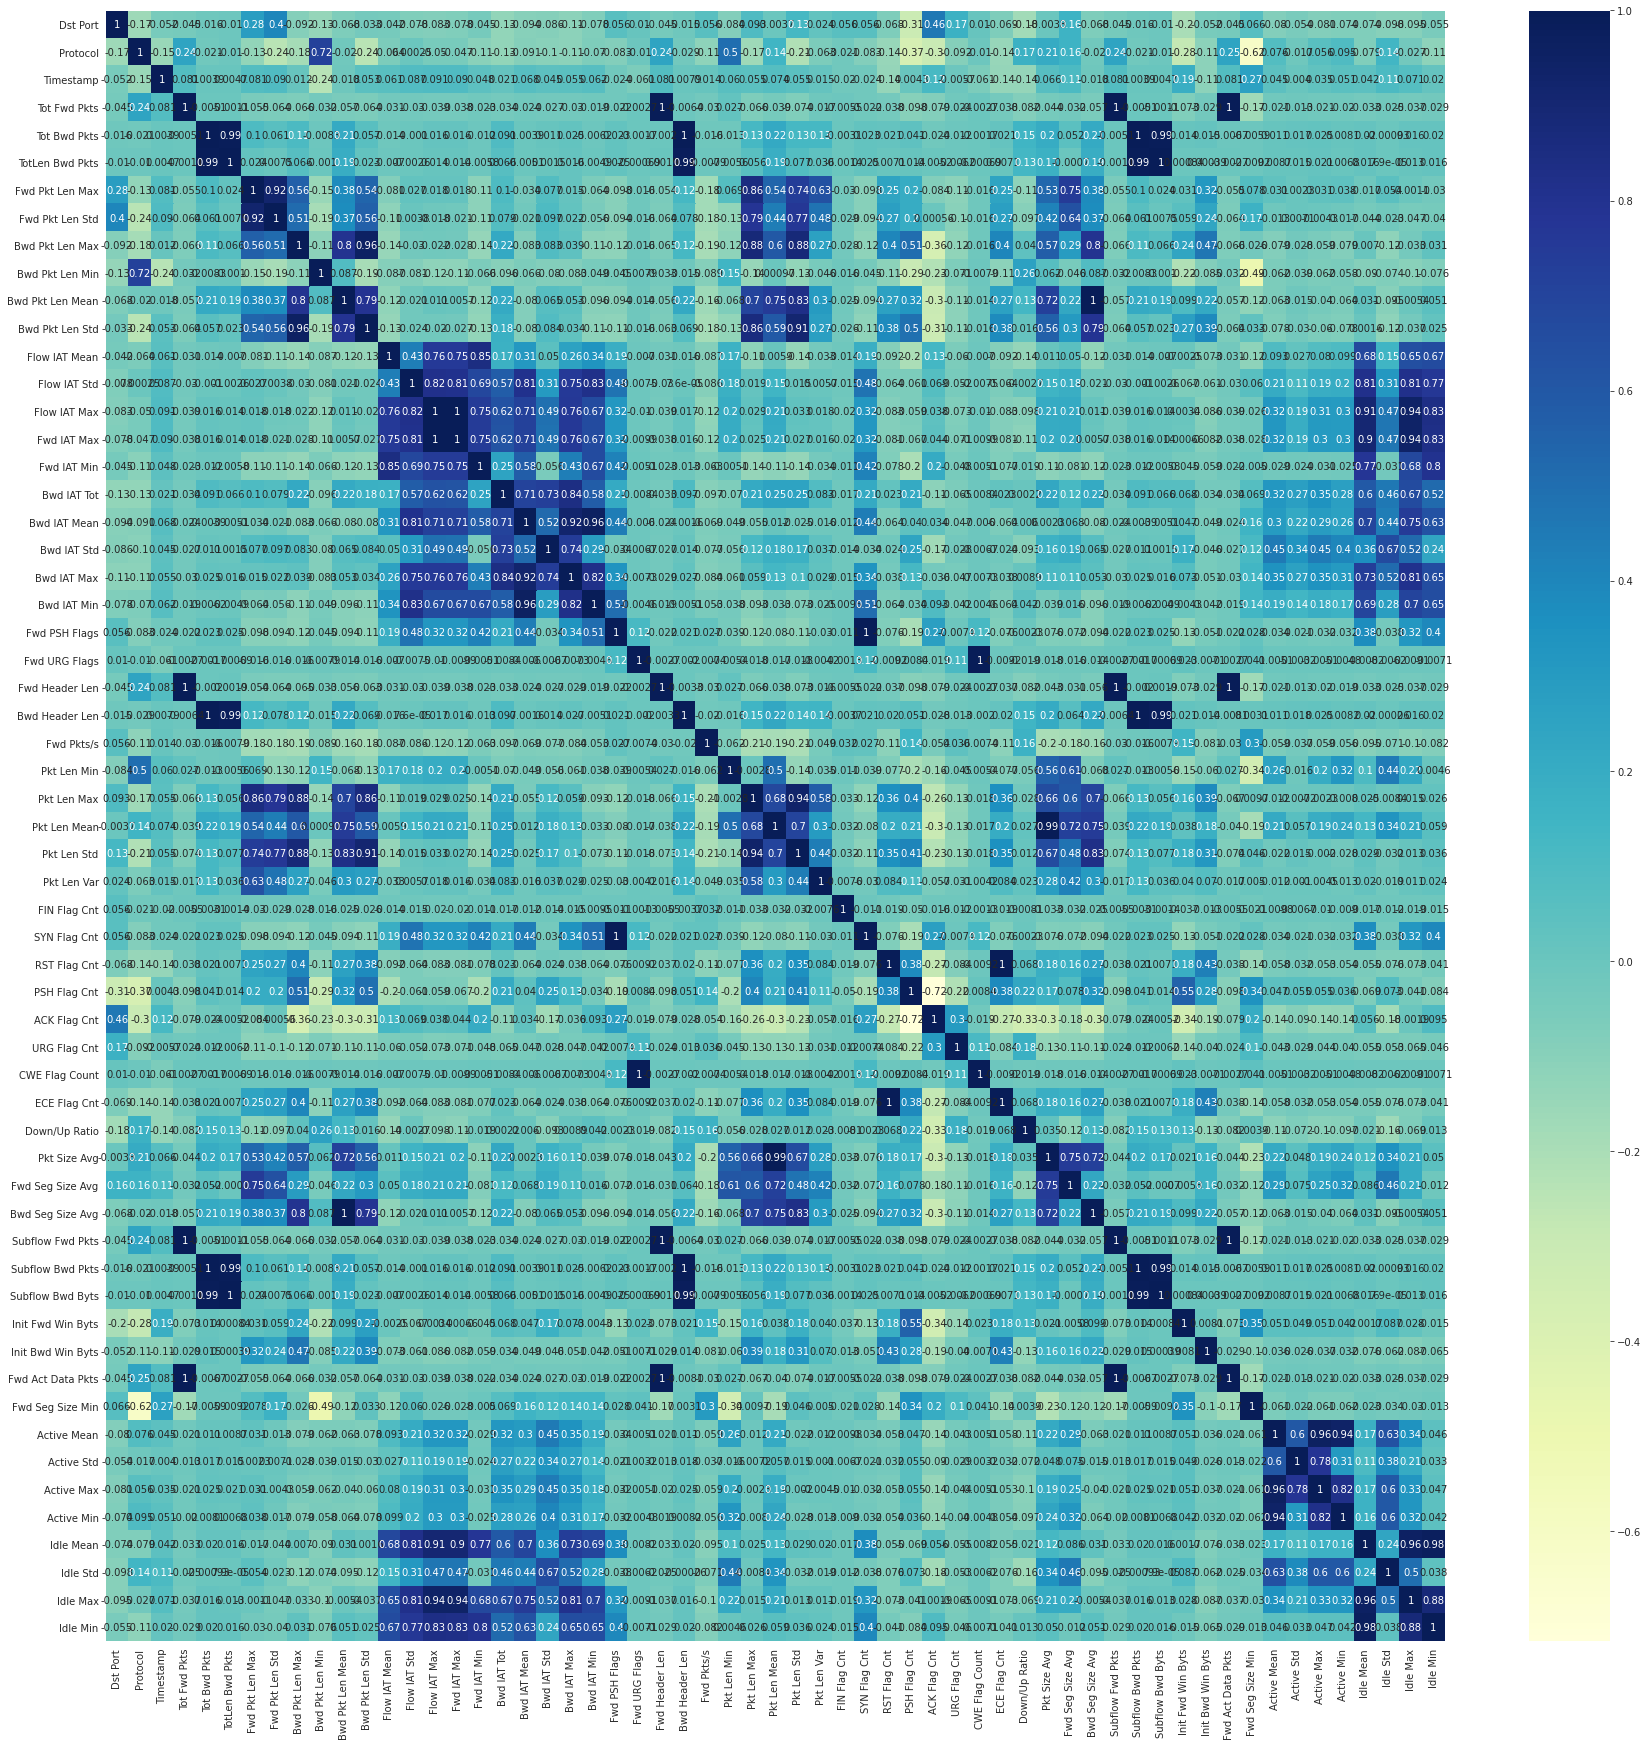

In [ ]:
from matplotlib import pyplot as plt  
import seaborn as sns
fig= plt.figure(figsize=(30,30))
sns.heatmap(X_data.corr(), annot=True,cmap="YlGnBu")

In [ ]:
def get_correlation_high(X_data,threshold): #Findout the features with the correlation value greater the 0.85
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
def get_correlation_medium(X_data,threshold): #Findout the features with the correlation value greater the 0.85
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>=threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col 

In [ ]:
corelated_features=get_correlation_medium(X_data,0.85)
corelated_features

{'Active Max',
 'Active Min',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd Pkt Len Std',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Pkt Len Max',
 'Pkt Len Std',
 'Pkt Size Avg',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts'}

In [ ]:
corelated_features=get_correlation_high(X_data,0.95)
corelated_features

{'Active Max',
 'Bwd Header Len',
 'Bwd IAT Min',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Idle Max',
 'Idle Min',
 'Pkt Size Avg',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts'}

In [ ]:
final_dataset.shape

(152390, 60)

In [ ]:
final_dataset.drop(['Active Max'],axis=1,inplace=True) #Dropping the highly correlated features from the dataset
final_dataset.drop(['Bwd Header Len'],axis=1,inplace=True)
final_dataset.drop(['Bwd IAT Min'],axis=1,inplace=True)
final_dataset.drop(['Bwd Pkt Len Std'],axis=1,inplace=True)
final_dataset.drop(['Bwd Seg Size Avg'],axis=1,inplace=True)
final_dataset.drop(['CWE Flag Count'],axis=1,inplace=True)
final_dataset.drop(['ECE Flag Cnt'],axis=1,inplace=True)
final_dataset.drop(['Fwd Act Data Pkts'],axis=1,inplace=True)
final_dataset.drop(['Fwd Header Len'],axis=1,inplace=True)
final_dataset.drop(['Fwd IAT Max'],axis=1,inplace=True)
final_dataset.drop(['Idle Max'],axis=1,inplace=True)
final_dataset.drop(['Idle Min'],axis=1,inplace=True)
final_dataset.drop(['Pkt Len Std'],axis=1,inplace=True)
final_dataset.drop(['Pkt Size Avg'],axis=1,inplace=True)
final_dataset.drop(['SYN Flag Cnt'],axis=1,inplace=True)
final_dataset.drop(['Subflow Bwd Byts'],axis=1,inplace=True)
final_dataset.drop(['Subflow Bwd Pkts'],axis=1,inplace=True)
final_dataset.drop(['Subflow Fwd Pkts'],axis=1,inplace=True)
final_dataset.drop(['TotLen Bwd Pkts'],axis=1,inplace=True)


In [ ]:
final_dataset.shape

(152390, 41)

In [ ]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Min', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')

In [ ]:
final_dataset['Label'].value_counts()

0    81137
1    71253
Name: Label, dtype: int64

This is clearly a slighlty imbalenced dataset where the Bening requests are lesser than the DDOC attacks.

Lets proceed to visualize how these 40 features can help in predicting the class label

In [ ]:
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Var', 'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Min', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')

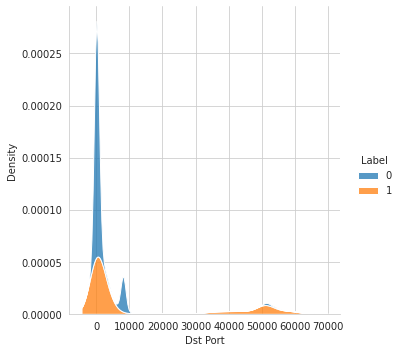

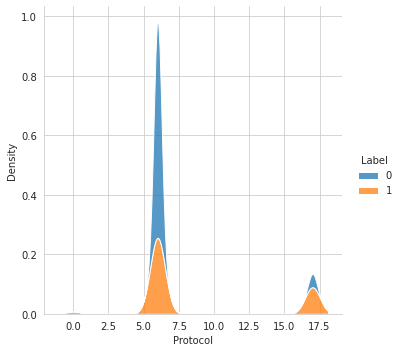

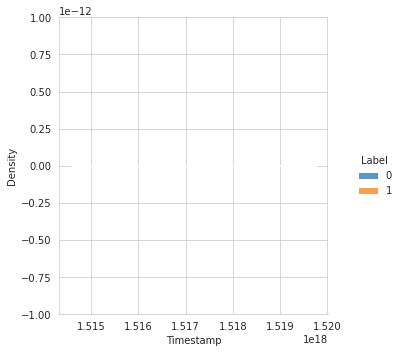

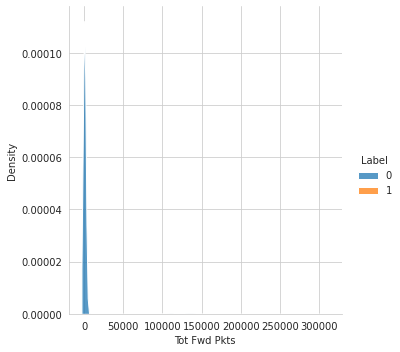

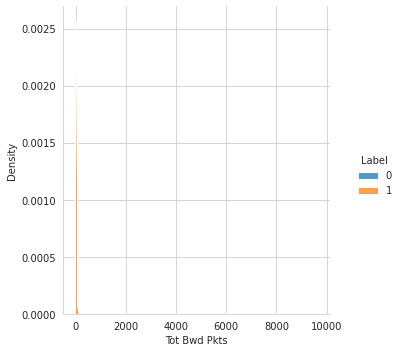

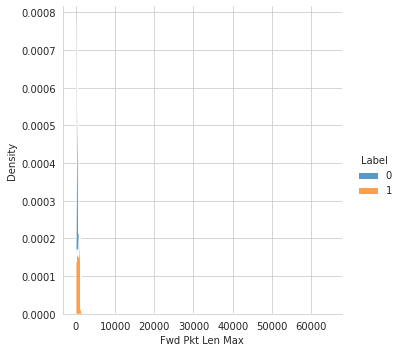

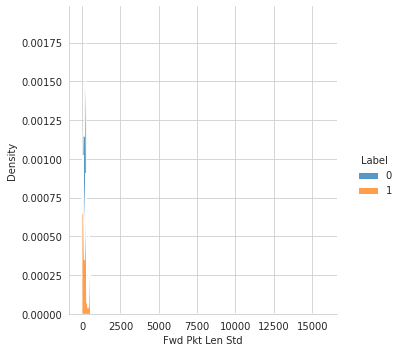

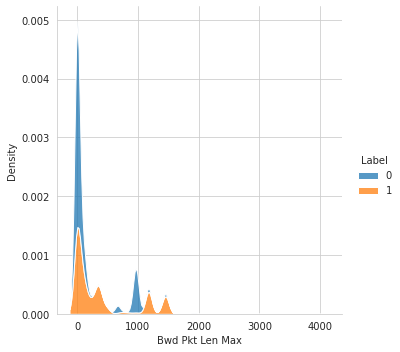

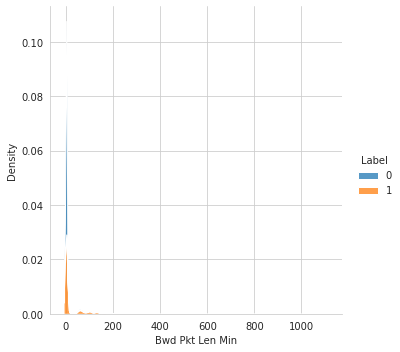

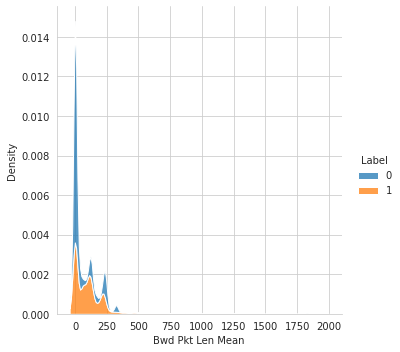

In [ ]:
import seaborn as sns
sns.displot(final_dataset, x="Dst Port", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Protocol", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Timestamp", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Tot Fwd Pkts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Tot Bwd Pkts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Pkt Len Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Pkt Len Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd Pkt Len Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd Pkt Len Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd Pkt Len Mean", hue="Label", kind="kde", multiple="stack")




1.   From the plots of the first 10 features we could see that each features are contributing to the  class labels in a farely good amount.
2.   We could see that the Timestamp feature is not being useful in classifying the types of class labels.
3.   The Dst Port, Protocol  and Bwd Pkt Len Mean features can be considered as a fairly good features in classifying the class labels.
4.  It can be interpretted from the 'Bwd Pkt Len Max' feature that if the feature value is between 1000 to 2000 it can a bening request.
5.  Also the feature values between 800 to 1000 can a DDOS attack.
6.  The Tot Fwd Pkts and Tot Bwd Pkts are accounting only to the DDOS attack and the Bening request    



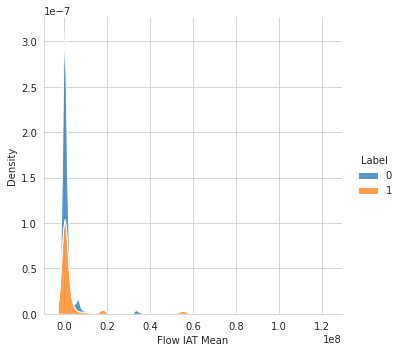

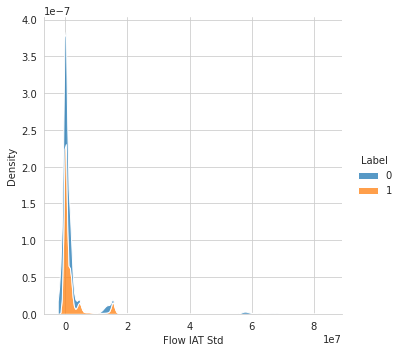

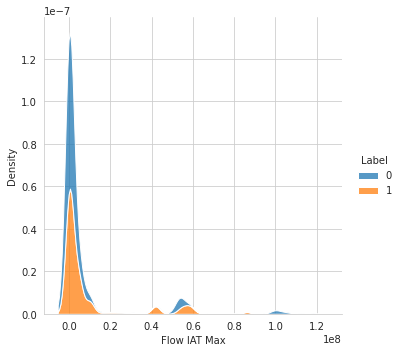

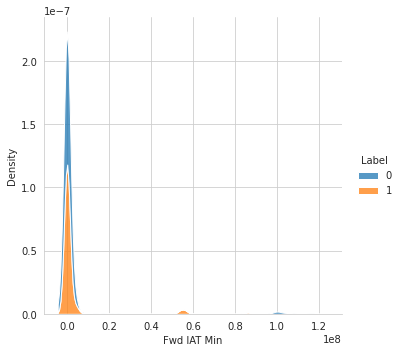

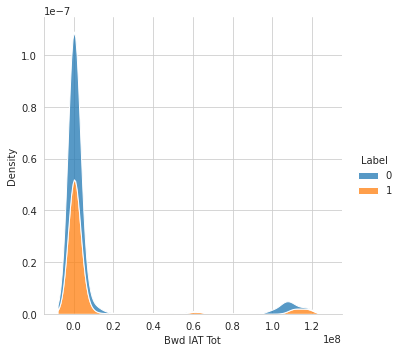

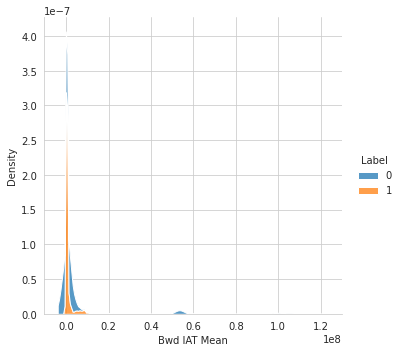

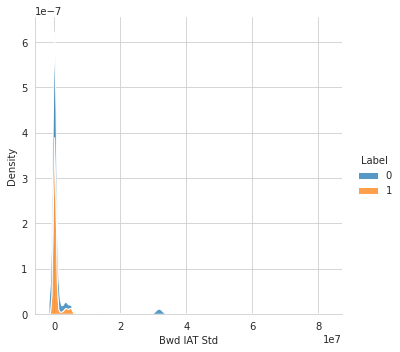

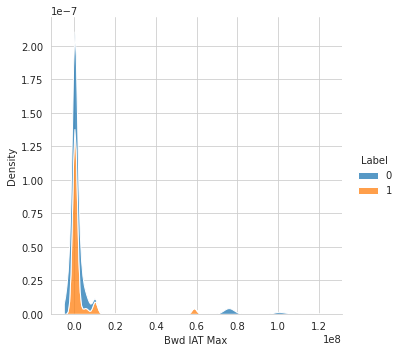

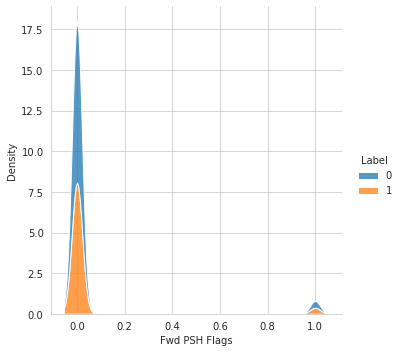

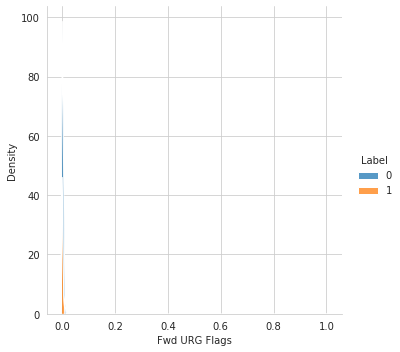

In [ ]:
sns.displot(final_dataset, x="Flow IAT Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Flow IAT Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Flow IAT Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd IAT Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Tot", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Bwd IAT Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd PSH Flags", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd URG Flags", hue="Label", kind="kde", multiple="stack")

1.  In the feature 'Bwd IAT Mean' if the values are close to 0.0 to 0.1 they are most likely to correspond to a Bening request, also from the graph we could see that the values lying above that are mostly likely to be a bening request.
2.  It could also be noticed from "FWD IAT Min" that a small amount of feature values between 0.5 to 0.55 are being Bening and the feature values 1 are being a DDOS attack
3.  The "BWD IAT Tot","Bwd IAt Max" is a farely a good feature with equal amount of Bening and DDOS request      


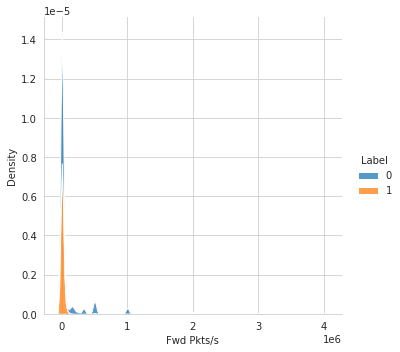

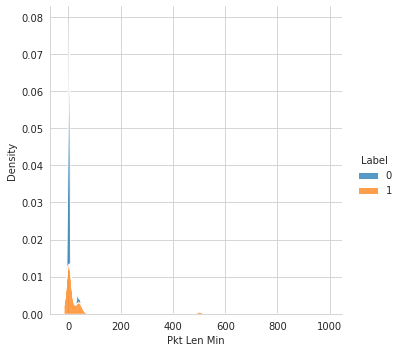

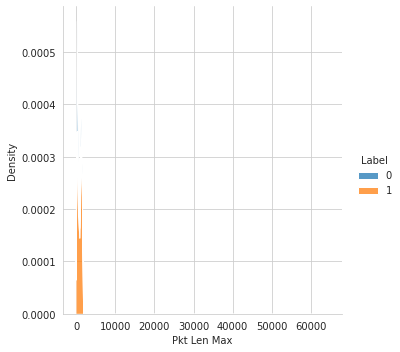

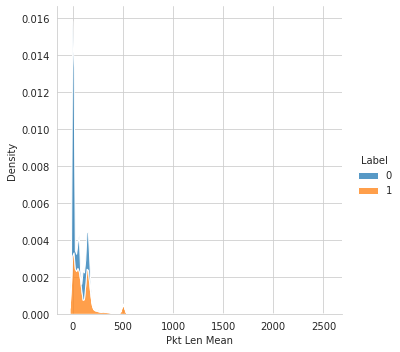

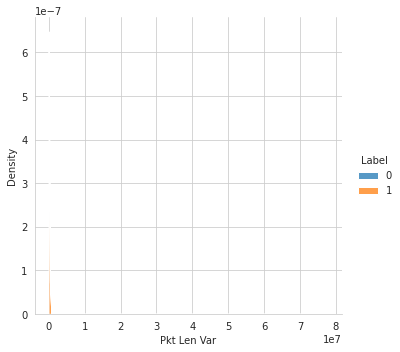

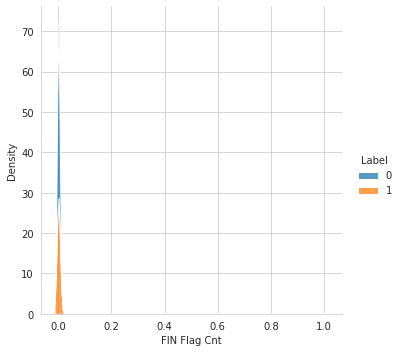

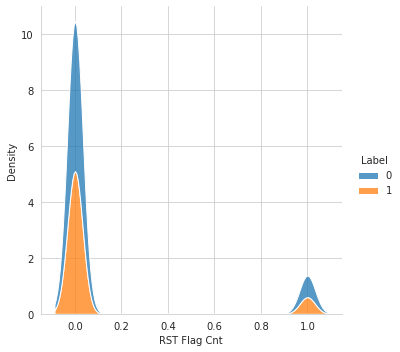

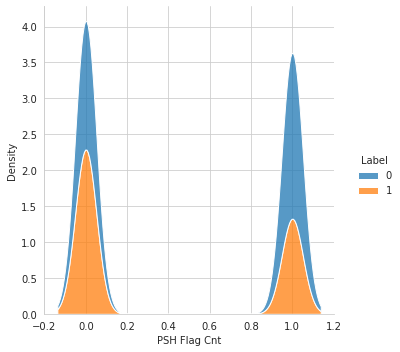

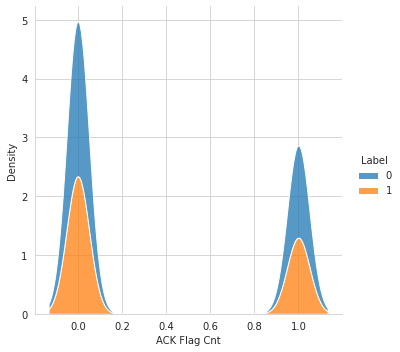

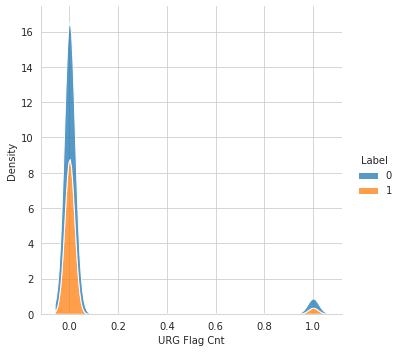

In [ ]:
sns.displot(final_dataset, x="Fwd Pkts/s", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Max", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Pkt Len Var", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="FIN Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="RST Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="PSH Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="ACK Flag Cnt", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="URG Flag Cnt", hue="Label", kind="kde", multiple="stack")


1. The "Pkt Len Max" and "Pkt Len Var" values are holding values like 0 and lesser than that but they contributes only ti Being request.
2.  The "RST Flag Cnt", "PSH Falg Cnt","ACK Flag Cnt" all these features are holding equal amount of Bening and DDOS requests and lie in a same numerical range. 

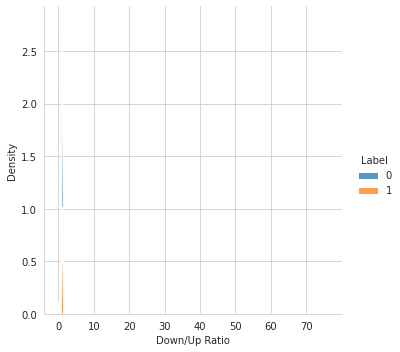

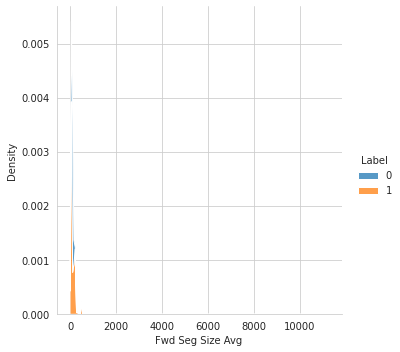

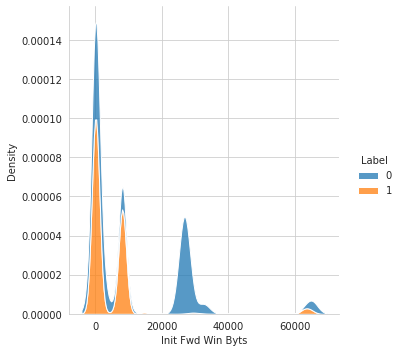

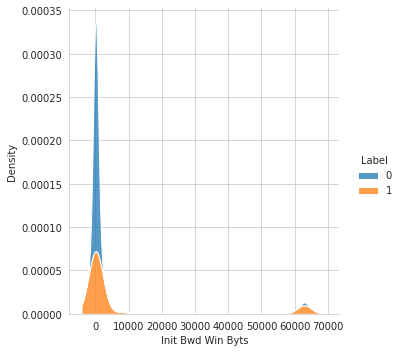

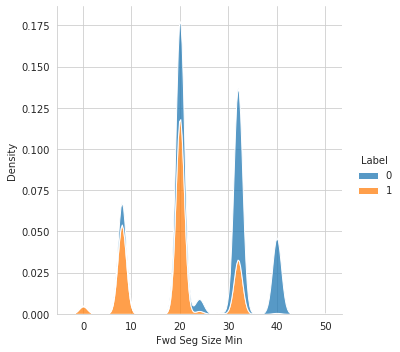

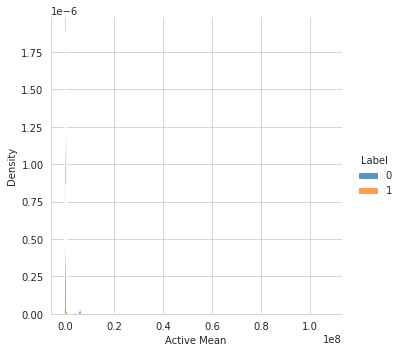

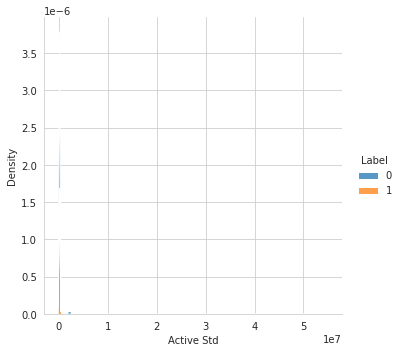

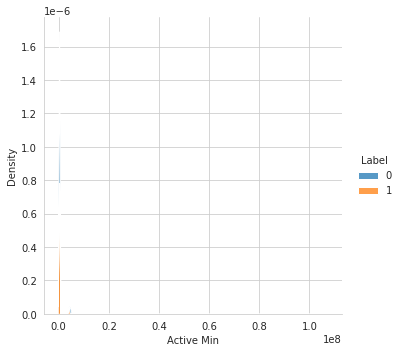

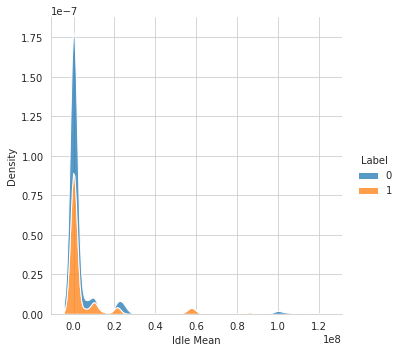

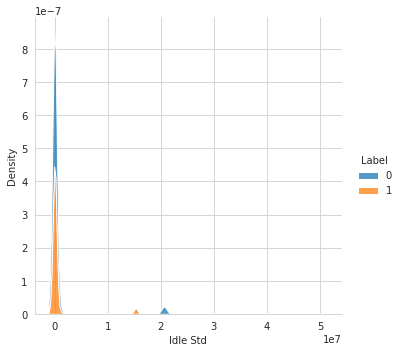

In [ ]:
sns.displot(final_dataset, x="Down/Up Ratio", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Seg Size Avg", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Init Fwd Win Byts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Init Bwd Win Byts", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Fwd Seg Size Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Active Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Active Std", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Active Min", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Idle Mean", hue="Label", kind="kde", multiple="stack")
sns.displot(final_dataset, x="Idle Std", hue="Label", kind="kde", multiple="stack")

1. The "Fwd Seg Sizw Min" feature seems to be a farely good feature here,  easy interpretabilty can be made saying most of the values from 0 to 10 are mostly  Bening and the values between 15 to 20 are also interpreted  as Bening.
2.  The "Fwd Seg Sizw Min" values greater than 40 are mostly interpreted as DDOS 
3. "Active Mean","Active Std", "Active Min" these three features seems to have lesser importance as they hold only zero values
4.  The "Init Fwd Win Byts" feature  has values in a wide range contributing both the class labels, it can interpreted as is this gfeature 
value lies between 25000 tp 40000 are most likely to be DDOS traffic